In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns
 

In [6]:
usd_inr = yf.download("USDINR=X",start = "2024-01-01",end = "2024-12-31",interval = "1wk")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [17]:
usd_inr = usd_inr.droplevel(level = 1,axis=1)

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
usd_inr.columns

In [ ]:
usd_inr.reset_index(inplace = True)

In [ ]:
usd_inr.columns

In [ ]:
usd_inr.drop(['High', 'Low', 'Open', 'Volume'],axis = 1,inplace = True)

In [ ]:
usd_inr.head()

In [ ]:
usd_inr.columns = ["Date", "USD to INR"]

In [ ]:
usd_inr.columns

In [ ]:
gold_usd = yf.download("GC=F",start = "2024-01-01",end = "2024-12-31",interval = "1wk")

In [ ]:
gold_usd = gold_usd.droplevel(level = 1,axis=1)

In [ ]:
gold_usd.drop(['High', 'Low', 'Open', 'Volume'],axis = 1,inplace = True)

In [ ]:
gold_usd.info()

In [ ]:
gold_usd.reset_index(inplace=True)

In [ ]:
gold_usd["Close"]

In [ ]:
usd_inr_like = yf.download("INR=X", start="2024-01-01", end="2024-12-31", interval="1wk")

In [ ]:
usd_inr_like = usd_inr_like.droplevel(level = 1,axis = 1)

In [ ]:
usd_inr_like.drop(['High', 'Low', 'Open', 'Volume'],axis = 1,inplace = True)

In [ ]:
usd_inr_like.reset_index(inplace=True)

In [ ]:
gold_price = (usd_inr_like["Close"] * gold_usd["Close"])/31.1


In [ ]:
gold_price = gold_price*1.03

In [ ]:
gold_price.head()

In [ ]:
usd_inr["gold_rate"] = gold_price

In [ ]:
usd_inr.info()

In [ ]:
usd_inr["USD to INR"] = usd_inr["USD to INR"].round(2)

In [ ]:
usd_inr

# Exploratory Date analysis

- Handle Missing Values - No missing values as per .info() - only non null values are present
- Handle imbalanced dataset - No our data set is balanced one
- Handle outliers - check with box plot
- Encode Categorical Features - no categorical values in our data set
- Normalization vs Standardization - We have to standardize the data mean =1 SD = 0

In [ ]:
sns.boxplot(usd_inr["USD to INR"])

In [ ]:
sns.regplot(x = "USD to INR", y = "gold_rate", data = usd_inr)

# Model Training

In [ ]:
X = usd_inr[["USD to INR"]]
y= usd_inr[["gold_rate"]]

In [ ]:
type(X),type(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=42)

In [194]:
y_test.count()

gold_rate    6
dtype: int64

In [196]:
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()

In [202]:
X_train_scaled = scaler.fit_transform(X_train)

In [208]:
X_test_scaled = scaler.transform(X_test)

In [210]:
X_test_scaled

array([[-0.37623727],
       [ 0.52501299],
       [ 1.31749165],
       [-0.50054764],
       [ 0.58716818],
       [-1.12209954]])

In [216]:
from sklearn.linear_model import LinearRegression

In [218]:
regressor = LinearRegression()

In [222]:
 regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [224]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [236]:
m = regressor.coef_[0][0]

In [234]:
c = regressor.intercept_[0]

In [304]:
m,c

(527.2424764744527, 6626.275744680846)

import matplotlib.pyplot as plt

In [240]:
X_predicted = regressor.predict(X_train_scaled)

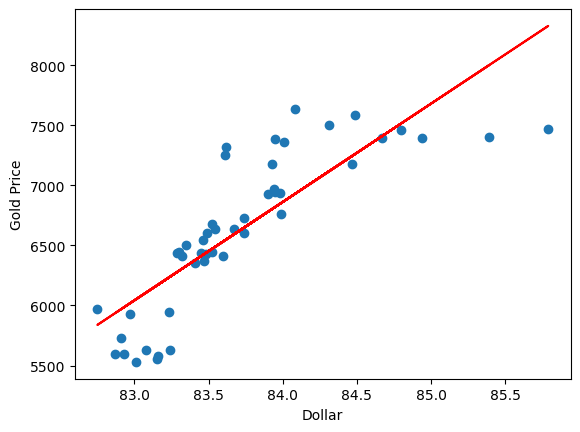

In [248]:
plt.scatter(X_train,y_train)
plt.plot(X_train,X_predicted,color = "red")
plt.xlabel("Dollar")
plt.ylabel("Gold Price")
plt.show()

In [250]:
X_test_predicted = regressor.predict(X_test_scaled)

In [252]:
X_test_predicted

array([[6427.90747711],
       [6903.08489134],
       [7320.9133073 ],
       [6362.36576481],
       [6935.85574749],
       [6034.65720327]])

In [254]:
y_test

,gold_rate
19,6668.39
41,7554.33
47,7440.77
12,6124.22
43,7627.07
5,5560.81


In [256]:
# Now find the error between actaual(y_test) and Predicted Data(X_test_predicted)

In [260]:
from sklearn.metrics import mean_squared_error

In [262]:
error = mean_squared_error(X_test_predicted,y_test)

In [264]:
error

209223.2303935952

# Hyperparameter Tuning

In [267]:
from sklearn.model_selection import RandomizedSearchCV

In [285]:
params_set = {"copy_X":[True,False],
             "fit_intercept" : [True,False],
             "n_jobs": [1,5,10,15,None],
             "positive":[True,False]}

In [287]:
search = RandomizedSearchCV(regressor,params_set,n_iter = 50,cv=5)

In [289]:
search.fit(X_train,y_train)

C:\Users\SrishaRavi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [291]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [297]:
tuned_model = LinearRegression(positive=True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [299]:
tuned_model.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=1, positive=True)

In [301]:
tuned_model.coef_[0][0],tuned_model.intercept_[0]

(527.2424764744527, 6626.275744680846)

# MLOPS

- Save the model
- Build interface
- Connect Model and interface

In [313]:
# to save the model we use Pickle

In [315]:
import pickle

In [321]:
pickle.dump(regressor,open("regressor.pkl","wb"))

In [30]:
regressor_reloaded = pickle.load(open("regressor.pkl","rb"))

NameError: name 'pickle' is not defined

In [327]:
regressor_reloaded.coef_[0][0]

527.2424764744527

In [329]:
pickle.dump(scaler,open("scaler.pkl","wb"))

# Connect to model interface

In [344]:
pip install gradio


     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     -------------------------------------- - 41.0/42.9 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 42.9/42.9 kB 518.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/51.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/51.3 MB 1.9 MB/s eta 0:00:27
   ---------------------------------------- 0.1/51.3 MB 1.6 MB/s eta 0:00:32
   ---------------------------------------- 0.1/51.3 MB 1.6 MB/s eta 0:00:32
   ---------------------------------------- 0.2/51.3 MB 1.1 MB/s eta 0:00:48
   ---------------------------------------- 0.2/51.3 MB 1.0 MB/s eta 0:00:50
   ---------------------------------------- 0.2/51.3 MB 808.4 kB/s eta 0:01:04
   ---------------------------------------- 0.2/51.3 MB 719.7 kB/s eta 0:01:11
   ---------------------------------------- 0.2/51.3 MB 719.7 kB/s eta 0:01:11
   ---------------------------------------- 0.2/51.3 MB 719.7 kB/s eta 0:01

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
forge 0.22.0 requires ruff<0.0.195,>=0.0.194, but you have ruff 0.11.2 which is incompatible.


In [3]:
import gradio as gr
import numpy as np

def calculate_gold_rate(usd_inr):
    scaled_input = scaler.transform(np.array(usd_inr).reshape(-1,1))
    return regressor.predict(scaled_input)[0][0].round(2)


demo=gr.Interface(
    fn=calculate_gold_rate,
    inputs=["number"],
    outputs=["number"],
    title = "Tell me the dollar to inr rate - I will give you the gold rate(1gm)!"
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
